In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive #toimport google drive data

In [0]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/"My Drive"

/content/drive/My Drive


In [0]:
#this changes the directory tothe drive

In [0]:
ls

 121.pdf
 123.JPG
 abc.txt
'Admit card_ISRO.pdf'
 A.gform
 Algorithms.zip
'ansi c_balaguruswamy.pdf'
 arm_inst.pdf
'Autocad EDW'/
'Autocad Exam Group 3'/
'Chimp1_small_0 (1).jpg'
 Chimp1_small_0.jpg
 Classroom/
 code.gdoc
'Colab Notebooks'/
'Common Papers'/
 Convocation/
'CPS_2017_Lecture Recording (1).xlsx.gsheet'
'CPS_2017_Lecture Recording (2).xlsx.gsheet'
'CPS_2017_Lecture Recording (3).xlsx.gsheet'
'CPS_2017_Lecture Recording (4).xlsx.gsheet'
'CPS_2017_Lecture Recording (5).xlsx.gsheet'
'CPS_2017_Lecture Recording (6).xlsx.gsheet'
'CPS_2017_Lecture Recording (7).xlsx.gsheet'
'CPS_2017_Lecture Recording.xlsx.gsheet'
'cryptography 4th edition.pdf'
'dda details'/
'Digital Electronics Project Groups.gform'
'Douglas B. West-Introduction to Graph Theory (2nd Edition)(With Solution Manual)%20 -Prentice Hall (2000).pdf'
 download
 download.gdoc
 Ebooks/
'GCam_6.1.021_V1.4.032219.apk (Unzipped Files)'/
 housing/
'IEEE International MYOSA Students contest-SENSORS 2018.gdoc'
'IEEE Internatio

In [0]:
#columnname=['x','y']
dataset=pd.read_csv("NG Machine Learning/train.csv")
print(dataset)
dataset.shape

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


(700, 2)

In [0]:
type(dataset)

pandas.core.frame.DataFrame

In [0]:
dataset.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [0]:
x_value = dataset.iloc[0:700,0:1]
x_value

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [0]:
y_value = dataset.iloc[0:700,1:2]
y_value

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
695,58.595006
696,94.625094
697,88.603770
698,63.648685


In [0]:
print("Mean of x values is %f and median is %f\n" % (np.mean(x_value), np.median(x_value)))
print("Mean of y values is %f and median is %f\n" % (np.mean(y_value), np.median(y_value)))

Mean of x values is 54.985939 and median is 49.000000

Mean of y values is 49.939869 and median is nan



Text(0.5, 1.0, 'Profit Vs Population')

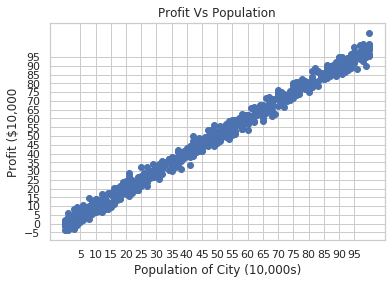

In [0]:
import matplotlib.pyplot as plt
plt.scatter(x_value,y_value)
plt.xticks(np.arange(5,100,step=5))
plt.yticks(np.arange(-5,100,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")

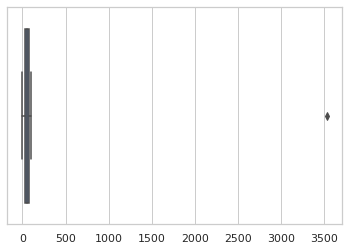

In [0]:
import seaborn as sns       #boxplot to see outliers data
sns.set(style="whitegrid")
ax = sns.boxplot(x_value)

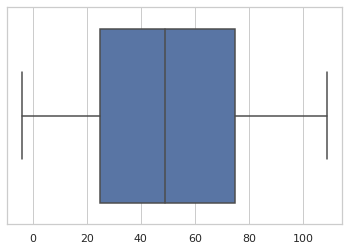

In [0]:
sns.set(style="whitegrid")
ay = sns.boxplot(y_value)

In [0]:
#define hypothesis
def hypothesis(theta_array, x):
    # Returns value of hypothesis at the point corresponding to the 'x' entry
    # H(x) = theta_0 + theta_1*x
    return theta_array[0] + theta_array[1]*x

In [0]:
#define cost function
def cost_function(theta_array, x_value, y_value, m):
    # This function returns our cost function value at particular theta values
    total_error = 0
    for i in range(m):
        total_error += (theta_array[0] + theta_array[1]*x_value[i] - y_value[i])**2
    return total_error/(2*m)

In [0]:
#initialize regularization parameters
# initializing values of thetas
    theta_0 = 0  # bias
    theta_1 = 0  # weight
    
    # defining a learning rate
    alpha = 0.0005

    # Setting the number of iterations
    iters = 50

In [0]:
#minimizing cost function error
def training(x_train, y_train, alpha, iters):
    # This is the function which takes care of the Regression

    # Finding size of the training data
    m = x_train.size

    # initializing values of thetas
    theta_0 = 0     # bias
    theta_1 = 0     # weight

    # creating a weight matrix which contains both theta_0 and theta_1
    theta_array = [theta_0, theta_1]

    # creating an array that stores the values of the cost function during each iteration
    cost_function_values = []

    for i in range(iters):
        # changing the values of theta 0 and theta 1 according to the gradient descent method
        theta_array = improvise_thetas(theta_array, x_train, y_train, alpha, m)

        # storing values of the cost function after every improvisation step (gradient descent step)
        cost_function_values.append(cost_function(theta_array, x_train, y_train, m))

        # print values every 10 iterations
        if i % 10 == 0:
            print('value of theta_0 at iteration %d is: ' % i, theta_array[0])
            print('value of theta_1 at iteration %d is: ' % i, theta_array[1], '\n')
            ynew=x_train*theta_array[1]+theta_array[0]
            plt.plot(x_train,ynew,'r')
            plt.scatter(x_train,y_train)
            plt.show()

    # Plot our cost function's progress over our training period to check if the model has learnt
    x = np.arange(0, len(cost_function_values), step=1)
    plt.plot(x, cost_function_values, "-b", label="Cost Function Curve")
    plt.title("Learning Curve")
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost Function Value")
    plt.legend()
    plt.show()
    print("Cost function values: ",cost_function_values)
    # By returning our theta_array and saving it we are basically saving our trained model
    return theta_array

In [0]:
#update the values of theta by gradient descent
def improvise_thetas(theta_array, X, Y, alpha, m):
    ''' This function updates the values of theta_0 and theta_1 and returns an array containing
            the updated theta values. This is where gradient descent takes place '''

    # initializing summations to zero
    summation_0 = 0
    summation_1 = 0

    for i in range(m):        # finding the value of summations and finally the value of
        summation_0 += (theta_array[0] + theta_array[1]*X[i]) - Y[i]

        summation_1 += X[i]*((theta_array[0] + theta_array[1]*X[i])-Y[i])

    new_theta_0 = theta_array[0] - alpha * (summation_0) / m

    new_theta_1 = theta_array[1] - alpha * (summation_1) / m

    updated_theta_array = [new_theta_0, new_theta_1]
    print(updated_theta_array)
    return updated_theta_array

In [0]:
raw_training_data = pd.read_csv("NG Machine Learning/train.csv")
cleaned_training_data = raw_training_data.dropna()  # Cleaning the data by removing the rows with "NaN" values in them. dropna() does the job Not avalable values
x_train_new = cleaned_training_data.as_matrix(columns=['x'])
y_train_new = cleaned_training_data.as_matrix(columns=['y'])

# reshaping the data from (699,1) to (699)
x_train = x_train_new.reshape(x_train_new.size)     #converting from column matrix to row matrix
y_train = y_train_new.reshape(y_train_new.size)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
type(x_train_new)

numpy.ndarray

[0.024969934585228885, 1.6677122922592695]
value of theta_0 at iteration 0 is:  0.024969934585228885
value of theta_1 at iteration 0 is:  1.6677122922592695 



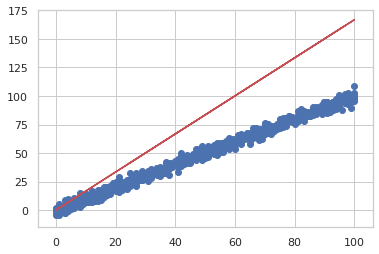

[0.008222647624206623, 0.5508896981718201]
[0.019412287875547014, 1.2987967439428518]
[0.01189330732667928, 0.7979434861386835]
[0.01690300035451925, 1.1333520983147873]
[0.013522574028208252, 0.9087381719133643]
[0.01576079275554235, 1.0591565827571774]
[0.01423635614811957, 0.9584257195346835]
[0.015231673875065159, 1.0258829072341247]
[0.014539581724282848, 0.9807089889978248]
[0.014977506707945776, 1.0109611544891928]
value of theta_0 at iteration 10 is:  0.014977506707945776
value of theta_1 at iteration 10 is:  1.0109611544891928 



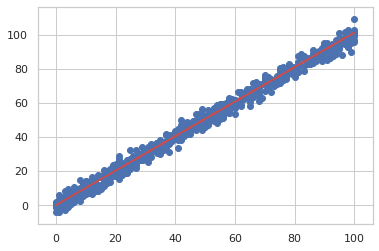

[0.014658692195799114, 0.9907024591641626]
[0.014846649386018007, 1.0042695563008357]
[0.014695238122750453, 0.9951844114995393]
[0.014771096171876564, 1.0012688761815427]
[0.014694761152290818, 0.9971946530692006]
[0.014720349021250256, 0.9999234354397591]
[0.01467768501782405, 0.9980964242520746]
[0.014680730694841227, 0.9993203079156313]
[0.014653169002898335, 0.9985010876415362]
[0.014646107458598526, 0.9990500801900452]
value of theta_0 at iteration 20 is:  0.014646107458598526
value of theta_1 at iteration 20 is:  0.9990500801900452 



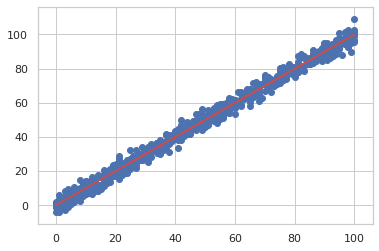

[0.01462532070437282, 0.9986828166162253]
[0.014613728559933913, 0.9989291455759388]
[0.01459598222556466, 0.9987645677364143]
[0.01458236038758847, 0.998875163304895]
[0.014565979680220763, 0.998801482445052]
[0.014551449711747592, 0.9988512066056152]
[0.014535683548563888, 0.9988182896278914]
[0.014520748428362507, 0.9988407151949741]
[0.014505259976132378, 0.9988260792702203]
[0.014490145270939088, 0.998836262402097]
value of theta_0 at iteration 30 is:  0.014490145270939088
value of theta_1 at iteration 30 is:  0.998836262402097 



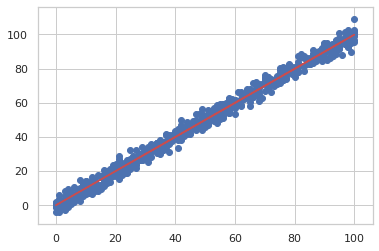

[0.014474783471960764, 0.9988298248178761]
[0.01445959033953598, 0.9988345176414071]
[0.01444428744952101, 0.9988317566763054]
[0.014429061254827983, 0.9988339872691963]
[0.014413786892454431, 0.9988328750993896]
[0.01439854797946267, 0.9988340014418455]
[0.01438328851930919, 0.9988336286637974]
[0.014368046011003499, 0.9988342597594276]
[0.014352795342046932, 0.998834218539493]
[0.014337553329218058, 0.998834627503767]
value of theta_0 at iteration 40 is:  0.014337553329218058
value of theta_1 at iteration 40 is:  0.998834627503767 



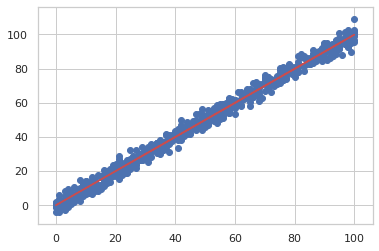

[0.014322308710363399, 0.998834734943736]
[0.014307069027050414, 0.9988350442587896]
[0.014291829228490191, 0.9988352183356274]
[0.014276592696663119, 0.9988354829301497]
[0.014261357166346238, 0.9988356868595846]
[0.01424612415409992, 0.9988359313670568]
[0.014230892643923937, 0.9988361486527195]
[0.014215663315807215, 0.9988363841203497]
[0.014200435713979479, 0.99883660736424]


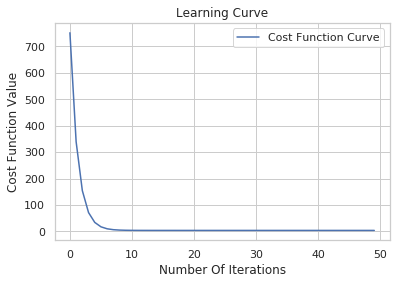

Cost function values:  [751.1315727959025, 339.0252776216905, 154.2109355552953, 71.32857852216124, 34.15892460395281, 17.489717384542462, 10.01419783210932, 6.6617051658959525, 5.158236669372401, 4.483986723829211, 4.181610449072815, 4.046005680924123, 3.985191729158383, 3.9579186761646357, 3.9456874685137873, 3.940201968962581, 3.9377416685983704, 3.9366380575877757, 3.936142871344035, 3.9359205410376394, 3.935820576532698, 3.9357754886019083, 3.9357550108376396, 3.9357455698820267, 3.9357410785890186, 3.935738807100083, 3.9357375311751848, 3.9357367017882194, 3.935736072721355, 3.9357355335550763, 3.9357350347702913, 3.9357345541595308, 3.935734081763553, 3.9357336131159952, 3.9357331462138245, 3.9357326801587655, 3.9357322145479356, 3.935731749200657, 3.935731284035887, 3.9357308190172526, 3.935730354128427, 3.9357298893620785, 3.9357294247149026, 3.9357289601854037, 3.935728495772894, 3.9357280314770455, 3.9357275672976844, 3.9357271032347447, 3.9357266392881574, 3.935726175457869

In [0]:
    # training time!
theta_array = training(x_train, y_train, alpha, iters)

print("\n*** The final value of theta_0 is ",theta_array[0]," and theta_1 is ",theta_array[1]," ***\n")


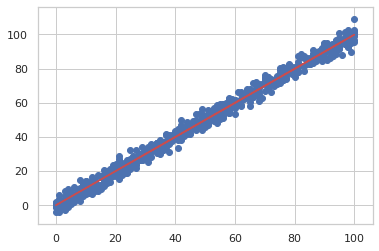

In [0]:
ynew=x_train*theta_array[1]+theta_array[0]
plt.plot(x_train,ynew,'r')
plt.scatter(x_train,y_train)

In [0]:
def testing(x_test, y_test, theta_array) :
    '''function where testing is done and the mean squared error is found'''
    m = x_test.size

    SSTO = []   # total sum of squares
    SSR = []    # regression sum of squares
    SSE = []    # error sum of squares
    y_mean = np.mean(y_train)

    for i in range(m):
        prediction = hypothesis(theta_array, x_test[i])  # value of prediction (value of hypothesis at point i)
        y_i = y_test[i]                             # value of 'y' at point i
        SSE.append((prediction - y_i)**2)           # sum of values in the array is SSE (error sum of squares)
        SSR.append((prediction - y_mean)**2)        # sum of values in the array is SSR (regression sum of squares)
        SSTO.append((y_i - y_mean)**2)              # sum of values in the array is SSTO (total sum of squares)

    print('\naverage error is : ', sum(SSE)/len(SSE))
    print('\nsum of squares of error (SSE) : ', sum(SSE))
    print('\nregression sum of squares (SSR) : ', sum(SSR))
    print('\ntotal sum of squares (SSTO) : ', sum(SSTO))
    print('\nThe Coefficient Of Determination R-squared is : ', (sum(SSR)/sum(SSTO))*100,'%')


In [0]:
testdata=pd.read_csv("NG Machine Learning/test.csv")
print(testdata)
testdata.shape

cleaned_testing_data = testdata.dropna()  # Cleaning the data by removing the rows with "NaN" values in them. dropna() does the job
x_test1 = cleaned_training_data.as_matrix(columns=['x'])
y_test1 = cleaned_training_data.as_matrix(columns=['y'])

# reshaping the data from (699,1) to (699)
x_test1 = x_test1.reshape(x_test1.size)
y_test1 = y_test1.reshape(y_test1.size)

      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [0]:
SSTO = []   # total sum of squares
SSR = []    # regression sum of squares
SSE = []    # error sum of squares
y_mean = np.mean(y_train)

In [0]:

for i in range(m):
  prediction = hypothesis(theta_array, x_test1[i])  # value of prediction (value of hypothesis at point i)
  y_i = y_test1[i]                             # value of 'y' at point i
  SSE.append((prediction - y_i)**2)           # sum of values in the array is SSE (error sum of squares)
  SSR.append((prediction - y_mean)**2)        # sum of values in the array is SSR (regression sum of squares)
  SSTO.append((y_i - y_mean)**2)              # sum of values in the array is SSTO (total sum of squares)


In [0]:
print('\naverage error is : ', sum(SSE)/len(SSE))
print('\nsum of squares of error (SSE) : ', sum(SSE))
print('\nregression sum of squares (SSR) : ', sum(SSR))
print('\ntotal sum of squares (SSTO) : ', sum(SSTO))
print('\nThe Coefficient Of Determination R-squared is : ', (sum(SSR)/sum(SSTO))*100,'%')       #regression coefficient


average error is :  8.060050880695881

sum of squares of error (SSE) :  2418.015264208764

regression sum of squares (SSR) :  235354.87402334606

total sum of squares (SSTO) :  238158.9758342828

The Coefficient Of Determination R-squared is :  98.82259242965172 %
